# Assignment 3
One of the most famous algorithms to sample microstates according to the canonical ensemble was proposed by Arianna Rosenbluth et al in 1952. This was probably the first scientific simulations performed on a computer.  In this assignment you will implement the basic steps of a Monte Carlo algorithm to simulate the same problem as in the previous assignment (i.e. N noninteracting distinguishable two-levels systems, with excited energy $\epsilon$). The algorithm works as follows:  
*	Select one initial configuration of the system. For your application, you need to specify a value of $N$, the temperature $T$, and initialize each particle in either the ground state or the excited state. 
*	Make a trial change. For your application, select one random particle and switch its state (from ground state to excited or vice-versa). 
*	If the energy change associated with the trial is negative (i.e. the selected particle was in the excited state and goes into the ground state), you accept the step. 
*	If the energy change is positive (i.e. the selected particle was in the ground state and goes in the excited state), you accept the step with a probability $w=e^{-\beta\epsilon}$. To do so, you generate a random number $r$ uniformly distributed in the unit interval. If $r\le w$, accept the new microstate; otherwise, retain the previous microstate. NOTE: if the trial move is NOT accepted, the previous microstate needs to be counted again.
*	Repeat the previous three steps many times (you may want to make sure that the number of steps is long enough so that the results are converged). 



Import useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here we set the simulation parameters. 

In [10]:
n_particles=10 # starting with a small number of particles help debudding your code, as you can print the arrays more easily
epsilon=1.0 # this is a real number that controls the scale of the energy. Whenever playing with toy models, it is a good idea to set to unity as many parameters as possible
kb=1.0 # here we will assume that the choice above for the energy scale is consistent with a unit value of the boltzmann constant
particle_states=np.array([0, 1]) # these are the states mentioned in the problem
n_particle_states=particle_states.size # the size attribute of a numpy array can be convenient

To simplify our work, let's start by coding a single simulation at one fixed temperature. Later on, we could repeat the same simulation for a range of temperatures, in order to extract the behavior of $E(T)$

In [26]:
T=1.0 # let's choose a value of T close to epsilon
beta=1./kb/T
acceptance_probability=np.exp(-beta*epsilon) # once T is specified, the MC acceptance probability is fixed

Here we need to generate an initial state for the system. We could generate a random state (e.g. in the same way we did random sampling in assignment 2) or we could start from a very symmetric state (e.g. where all the particles are in the ground state or all the particles are in the excited state). Which choice do you think is more efficient?

In [14]:
microstate= # use a numpy function to create an array with a 0 or 1 for each particle (the lenght of the array needs to be n_particles)

If you want to check the microstate, print it!

In [15]:
print(microstate)

[1 0 1 0 1 1 0 0 0 1]


In [57]:
n_samples=10000 # the convergence of the results will depend on this parameter
microstate_energies=np.zeros(n_samples) # here we create the container for the Monte Carlo microstates
microstate_energies[0]=np.sum(microstate)*epsilon # store the energy of the first microstate
#
# Now we need to implement the iterations of the MC sampling
# by using a python for loop, we can repeat steps 2-4 n_samples times
#
for i in np.arange(n_samples):
    #
    # first we make a trial change in the microstate
    # we select a random particle and switch its state
    # to choose an integer number from 0 to n we can use 
    # the np.random.randint(0,n) function
    #
    particle= # random integer between 0 and n
    #
    # we switch the state of the specified particle
    #
    microstate[particle]=1-microstate[particle]
    #
    # we look at the new energy and compare it with the old one
    #
    new_energy=np.sum(microstate)*epsilon
    old_energy=microstate_energies[i-1]
    #
    # now we need to check if the new state has lower or higher energy
    # to do so we can use the python if construct 
    # if <conditional expression> : 
    # where a conditional expression is a logical expression such as a > b, a <= b, or a == b
    # note that to check if two things are equal you need two =, as a single = is an assignment operator
    #
    if  : # if the new energy is higher than the old enerdy
        r= # pick a random numer between 0 and 1, you can use the np.random.random() function with no arguments
        if : # if the random number is lower than the acceptance threshold accept the step and store the energy
            microstate_energies[i]=new_energy
        else: # otherwise, switch back the particle state to the one before the trial step
            microstate[particle]=1-microstate[particle]
            microstate_energies[i]=old_energy # and save the old energy
    else: # if the new energy is lower than the old energy, accept the step and store the energy
        microstate_energies[i]=new_energy

SyntaxError: invalid syntax (<ipython-input-57-74cb81022b38>, line 15)

in the following you can learn more about the use of the suggested functions, e.g. using the help() function

In [ ]:
help(np.random.randint)
# or help(np.random.random)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

We can plot the distribution of the energies from the MC sampling

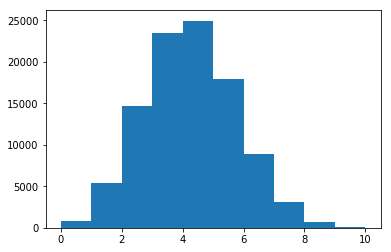

In [54]:
plt.hist(microstate_energies)
plt.show()

But we can also look at the energies as a function of the MC steps. We can see that the microstate energy can go up and down and that several times the trial move is rejected and the microstate stays the same.

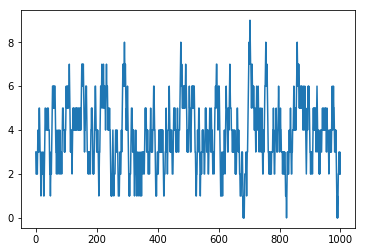

In [58]:
plt.plot(microstate_energies[0:1000]) # by specifying these indexes we can print a limited part of the results
plt.show()

In a MC simulation we don't need to compute the partition function and the Boltzmann factors to compute the probability of a state. The algorithm already produces states according to the Boltzmann distribution, so to compute any expectation value we just need to average over the sampled microstates. Does your result agree with the analytic value?

In [62]:
average_energy=np.average(microstate_energies)
print(average_energy)

3.7574


Now, if the code above works, we can setup a for loop to repeat the MC simulation for a range of temperatures. NOTE that, at each temperature we need to recompute beta and the acceptance probability. At each temperature we also need to re-initialize the microstate and the microstate energies.

In [63]:
min_temperature=0.05
max_temperature=2
dt=0.2
temperatures=np.arange(min_temperature,max_temperature,dt)
n_temperatures=temperatures.size
average_energies=np.zeros(n_temperatures)
#
n_samples=100000
for j,T in enumerate(temperatures):
    beta=1./kb/T
    acceptance_probability=np.exp(-beta*epsilon)
    microstate_energies=np.zeros(n_samples)
    microstate= # the same thing you implemented above
    microstate_energies[0]=np.sum(microstate)*epsilon
    for i in np.arange(n_samples):
        particle= # random integer between 0 and n
        microstate[particle]=1-microstate[particle]
        new_energy=np.sum(microstate)*epsilon
        old_energy=microstate_energies[i-1]
        if # here you can copy and paste the entire if block you used above
           # pay attention to the indentation
    average_energies[j]=np.average(microstate_energies)

Plot the results as a function of temperature. You can compare to the analytic results, following what was done in the previous assignment. Are the results better than the random sampling? How can you improve their accuracy?

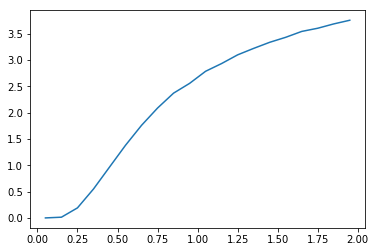

In [50]:
plt.plot(temperatures,average_energies)
plt.show()